# Solving the Lokta-Volterra equations

This is an example that illustrates a couple aspects of calculations that can be done with `elvet`:
- It consists of a pair of coupled ODEs
- The solutions are oscillating

The Lokta-Volterra equations are:
$$
\frac{dx}{dt} = (a - b y) x, \qquad \frac{dy}{dt} = -(c - d x) y.
$$
This is a model for the time evolution of a population of preys $x$ and predators $y$.

In [ ]:
%%capture
!pip install elvet

In [1]:
import elvet
import elvet.plotting

## Computation

Differential equations with oscillatory solutions are harder to solve using neural nets. Usually, solving in a small domain and extending the solution is a good approach. Here, we solve in the $[0, 2]$ interval, and the extend to the $[0, 4]$ and $[0, 6]$ intervals.

We check the solution by plotting it at each step of the calculation. The solution must be oscillatory, with the predator oscillations having a relative phase with respect to the prey's.

 Elvet: epoch = 1, loss = 6.83e+01, elapsed time = 00:00:02
 Elvet: epoch = 10000, loss = 4.07e-02, elapsed time = 00:00:09
 Elvet - WARNING: Loss is less than 0.001. Terminating.
 Elvet - WARNING: Early stop by the user!
 Elvet: epoch = 15260, loss = 1.00e-03, elapsed time = 00:00:13


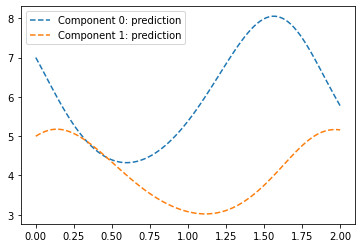

 Elvet: epoch = 1, loss = 1.36e+01, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 1.06e-01, elapsed time = 00:00:09
 Elvet: epoch = 20000, loss = 1.59e-02, elapsed time = 00:00:17
 Elvet - WARNING: Loss is less than 0.001. Terminating.
 Elvet - WARNING: Early stop by the user!
 Elvet: epoch = 25900, loss = 1.00e-03, elapsed time = 00:00:22


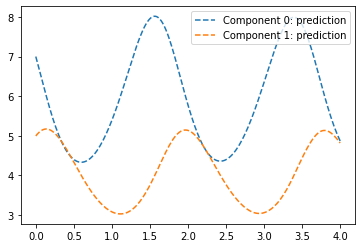

 Elvet: epoch = 1, loss = 4.21e+00, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 5.31e-02, elapsed time = 00:00:10
 Elvet: epoch = 20000, loss = 1.43e-02, elapsed time = 00:00:20
 Elvet: epoch = 30000, loss = 2.76e-03, elapsed time = 00:00:30
 Elvet: epoch = 40000, loss = 1.06e-03, elapsed time = 00:00:38
 Elvet - WARNING: Loss is less than 0.001. Terminating.
 Elvet - WARNING: Early stop by the user!
 Elvet: epoch = 40954, loss = 1.00e-03, elapsed time = 00:00:39


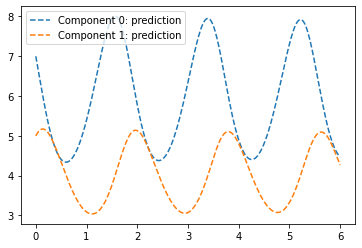

In [2]:
a = 4
b = 1
c = 3
d = 0.5


def equation(t, xy, dxy):
    x, y = xy[0], xy[1]
    dxdt, dydt = dxy[0,0], dxy[0,1]

    return (
        dxdt - a * x + b * y * x,
        dydt + c * y - d * x * y,
    )


bcs = (
    elvet.BC(0, lambda t, xy, dxy: xy[0] - 7),
    elvet.BC(0, lambda t, xy, dxy: xy[1] - 5),
)
domains = [elvet.box((0, t_max, 50 * t_max)) for t_max in [2, 4, 6]]

model = elvet.nn(1, 10, 10, 10, 2)  # Deeper neural net for oscillatory problems

solver = elvet.solver(equation, bcs, domain=domains[0], model=model, callbacks=elvet.utils.callbacks.EarlyStopping(min_loss=1e-3))

for domain in domains:
    solver.domain = domain
    solver.fit(epochs=1e5, verbose=True)
    elvet.plotting.plot_prediction(solver)

## Checks

We can plot the evolution of the total loss and the loss density for the final solution.

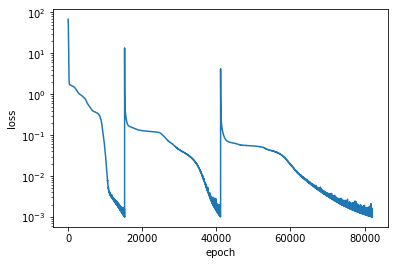

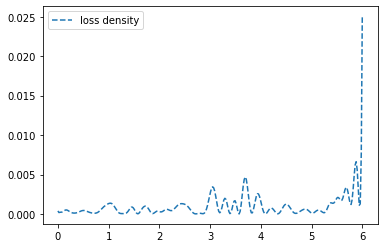

In [3]:
elvet.plotting.plot_losses(solver)
elvet.plotting.plot_loss_density(solver)